# Setup

set working directory to guitarist-net and add to path

In [1]:
%cd /content/drive/Othercomputers/My MacBook Pro/guitarist-net

/content/drive/Othercomputers/My MacBook Pro/guitarist-net


install requirements

In [2]:
!pip install -r requirements.txt &> /dev/null

imports

In [3]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import librosa
import librosa.display
from plot_listen.listen import play
from plot_listen.plot import plot, plot_single_string_item
from save_load import load_weights_from_file
from util import torch_to_numpy
from globals import *
from data.single_string_dataset import SingleStringDataset
from ddsp.ddsp_mono_synth import DDSPMonoSynth
from scipy.io import wavfile
import os

# Load Train Data

train_dataset

In [4]:
train_dataset = SingleStringDataset("train_player-not00_solo_e-string.npz")

sweetcocoa loudness extracted.
shape: (457, 1000)


directory of sweetcocoa model output

In [5]:
sc_output_path = "/content/drive/MyDrive/Research/guitarist-net-storage/off-the-shelf/audio_examples"

# Data Index

In [39]:
# max 456
idx = 10

# Input Data

In [40]:
input_audio = train_dataset[idx]['audio'][:SR]
play(input_audio)

# Examine output

In [41]:
resynth_file_path = os.path.join(sc_output_path, f"{idx}_reverb.wav")
resynth_audio, sr = librosa.load(resynth_file_path, SR)
resynth_audio = resynth_audio[:SR]
play(resynth_audio)

# Compare Input + Resynthesized Audio

show spectrograms

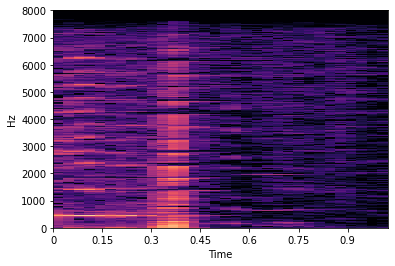

In [14]:
og_audio = input_audio
og_spec = librosa.amplitude_to_db(np.abs(librosa.stft(og_audio)))
og_img = librosa.display.specshow(og_spec, y_axis='linear', x_axis='time', sr=SR)

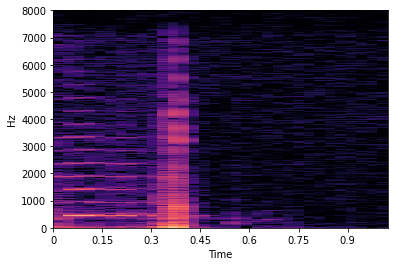

In [15]:
resynth_audio = resynth_audio
resynth_spec = librosa.amplitude_to_db(np.abs(librosa.stft(resynth_audio)))
resynth_img = librosa.display.specshow(resynth_spec, y_axis='linear', x_axis='time', sr=SR)

My Model